<a href="https://colab.research.google.com/github/gabrielbaltazarmw2/handson-ml2/blob/main/03_Classifica%C3%A7%C3%A3o_(predi%C3%A7%C3%A3o_de_classes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#MNIST

baixando dataset para a variavel mnist:

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

atribuindo os dados a variavel X, e os rótulos dos dados a variavel y:

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape, y.shape

((70000, 784), (70000,))

X possui 70000 linhas com 784 valores cada linha (colunas), cada linha representa uma imagem, mas precisamos fazer um reshape 784=28x28 pixels:

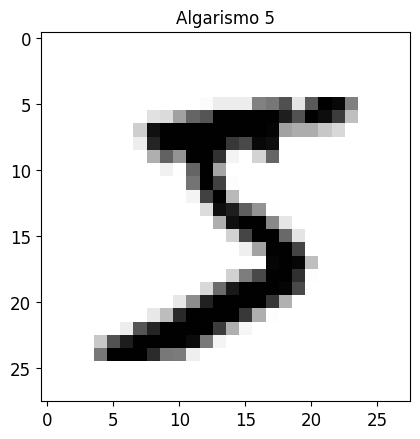

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.title("Algarismo 5")
plt.show()

o rótulo correspondente a esse dado X[0] é y[0] e é uma string:

In [5]:
y[0]

'5'

transformando para inteiro de 8 bits:

In [6]:
y = y.astype(np.uint8)

In [7]:
y[0]

5

separando o dataset em dados de treinamento (X_train) contendo 60000 imagens, dados de teste (X_test) contendo 10000 imagens, rótulos para o treinamento (y_train) contendo 60000 rótulos, rótulos de teste (y_test) contendo 10000 rótulos

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Treinando um Classificador Binário

Distinção entre duas classes

Vamos criar um classificador para o número 5. Ou é o número 5 (True) ou não é (False)

y_train_5 = (y_train == 5) retorna um array com True onde houver 5 na base de rótulos de treinamento y_train, o mesmo ocorre para y_test_5 = (y_test == 5)

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
y_train_5

array([ True, False, False, ...,  True, False, False])

importando o modelo linear de classificação gradiente descendente estocástico e treinando com o método fit com os paramentros X_train e y_train_5

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

fazendo a predição com o método predict para some_digit que sabemos que é 5:

In [11]:
sgd_clf.predict([some_digit])

array([ True])

predição para valor aleatório:

In [22]:
indice = np.random.randint(len(X_test))

In [ ]:
digito_aleatorio = X_test[indice]

In [25]:
sgd_clf.predict([digito_aleatorio])

array([False])

rótulo correspondente a esse digito aleatorio:

In [26]:
y_test[indice]

4

#Cálculo de Desempenho

##Calculando a acurácia com a validação cruzada

importando a validação cruzada:

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=4, scoring="accuracy")

array([0.95766667, 0.9664    , 0.96513333, 0.95366667])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

##Matriz de confusão

In [56]:
from sklearn.model_selection import cross_val_predict

In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [ ]:
y_train_perfect_predictions = y_train_5

In [ ]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

##Precisão e revocação

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [89]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

ValueError: ignored

##Trade-off orecisão/revocação

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [ ]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

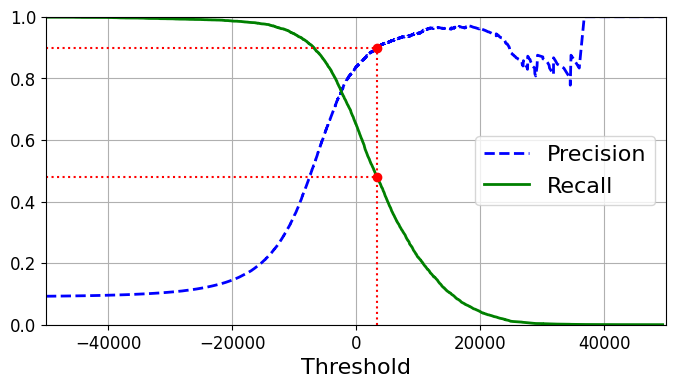

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [ ]:
(y_train_pred == (y_scores > 0)).all()

True

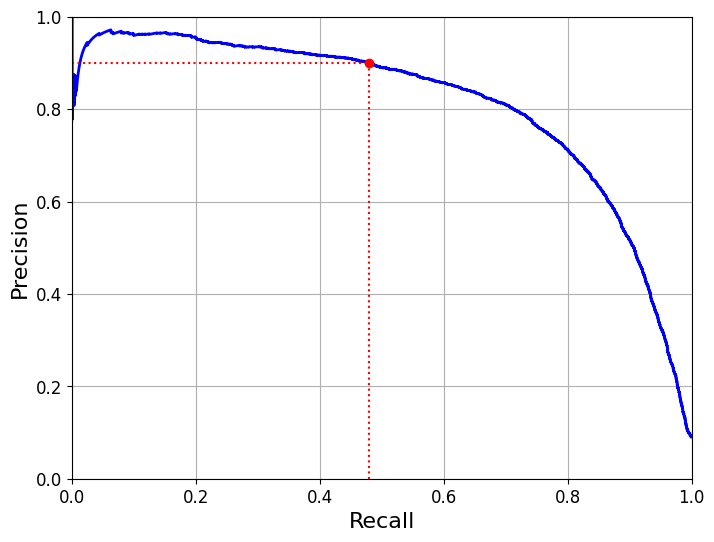

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [ ]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [ ]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## A curva ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

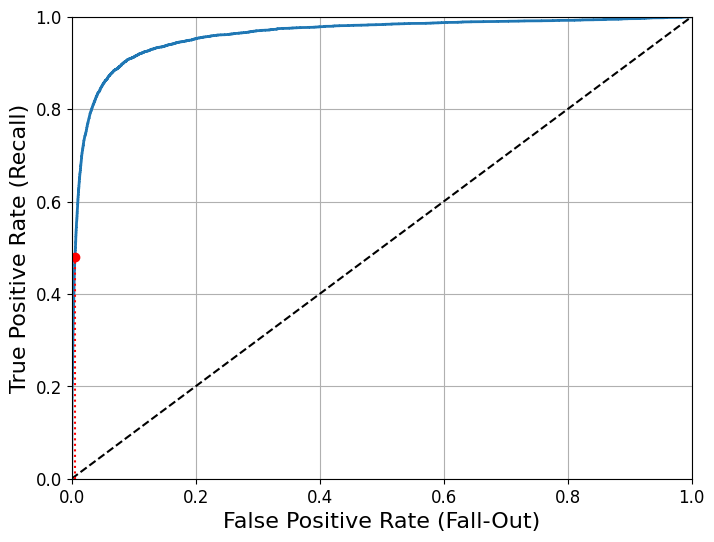

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

inicio.
Salvando no google drive

In [ ]:
# Salvando y_probas_forest
import joblib

joblib.dump(y_probas_forest, "my_y_probas_forest.pkl")

['my_y_probas_forest.pkl']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

# Caminho do arquivo no Colab
caminho_arquivo_colab = "/content/my_y_probas_forest.pkl"

# Caminho da pasta no Google Drive onde deseja salvar o arquivo
caminho_pasta_drive = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/Mãos à Obra: ML com Scikit-Learn, Keras & TF/Cap. 3"

# Copia o arquivo para a pasta no Google Drive
shutil.copy2(caminho_arquivo_colab, caminho_pasta_drive)


'/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/Mãos à Obra: ML com Scikit-Learn, Keras & TF/Cap. 3/my_y_probas_forest.pkl'

carregando arquivos:

In [ ]:
# Caminho do arquivo no Google Drive
caminho_arquivo_drive = "/content/drive/MyDrive/Colab Notebooks/MACHINE LEARNING/Mãos à Obra: ML com Scikit-Learn, Keras & TF/Cap. 2/my_y_probas_forest.pkl"

# Caminho de destino no Colab
caminho_destino_colab = "/content/my_y_probas_forest.pkl"

# Copiar o arquivo do Google Drive para o Colab
shutil.copy2(caminho_arquivo_drive, caminho_destino_colab)

'/content/my_forest_rmse_scores.pkl'

In [ ]:
my_y_probas_forest_loaded = joblib.load("my_y_probas_forest.pkl")

In [ ]:
y_scores_forest = my_y_probas_forest_loaded

fim.

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

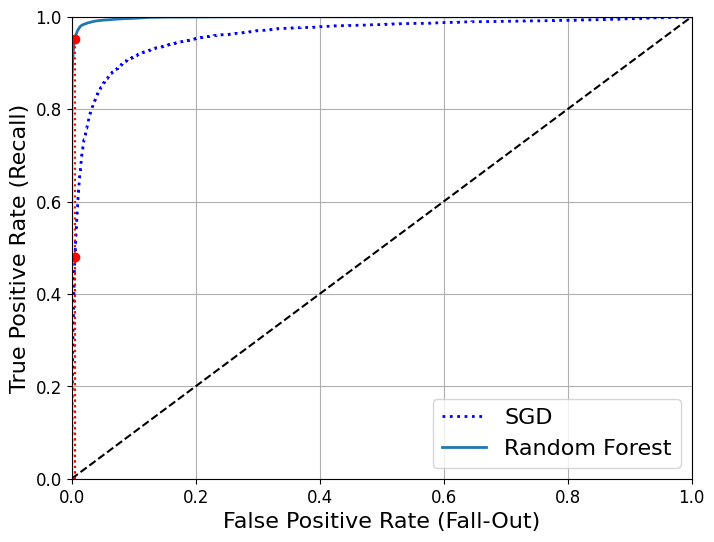

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [ ]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [ ]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

# Classificação Multiclasse

In [28]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [30]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
my_svm_clf = svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [32]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [34]:
np.argmax(some_digit_scores)

5

In [35]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [36]:
svm_clf.classes_[5]

5

In [37]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [38]:
len(ovr_clf.estimators_)

10

In [40]:
sgd_clf.fit(X_train[:1000], y_train[:1000])
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

In [41]:
sgd_clf.decision_function([some_digit])

array([[-6049581.97985829, -6138036.45541781, -3886281.38604606,
         -604692.42366776, -6948311.32017537,   914498.2913215 ,
        -6855666.78647961, -3866146.33271573, -4016434.08430155,
        -3209136.89074954]])

In [43]:
cross_val_score(sgd_clf, X_train[:1000], y_train[:1000], cv=3, scoring="accuracy")

array([0.83233533, 0.82882883, 0.79279279])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[:1000].astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train[:1000], cv=3, scoring="accuracy")

array([0.83532934, 0.81681682, 0.82882883])

In [51]:
indice = np.random.randint(1000)
x = X_train[indice]
sgd_clf.predict([x])

array([1], dtype=uint8)

In [52]:
y_train[indice]

1

In [54]:
sgd_clf.decision_function([x])

array([[-7283801.5352087 ,   722625.02040182,  -497930.20474686,
        -1325230.52128688, -1150030.97516103, -3147620.99344986,
        -3015535.7269502 ,  -495378.92390478, -1437245.83643093,
         -157033.17434716]])

#Análise de Erro

In [69]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train[:1000], cv=3)
conf_mx = confusion_matrix(y_train[:1000], y_train_pred)
conf_mx

array([[ 95,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 106,   2,   0,   0,   5,   1,   0,   1,   1],
       [  1,   3,  76,   2,   3,   1,   4,   3,   5,   1],
       [  1,   2,   5,  75,   0,   4,   0,   3,   0,   3],
       [  0,   0,   0,   3,  90,   3,   1,   1,   2,   5],
       [  1,   0,   2,   9,   2,  65,   2,   1,   8,   2],
       [  2,   1,   3,   0,   2,   4,  82,   0,   0,   0],
       [  0,   2,   3,   0,   3,   0,   0, 106,   0,   3],
       [  2,   6,   2,   1,   0,   6,   2,   2,  64,   2],
       [  3,   0,   2,   1,   7,   1,   0,  17,   1,  68]])

In [63]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

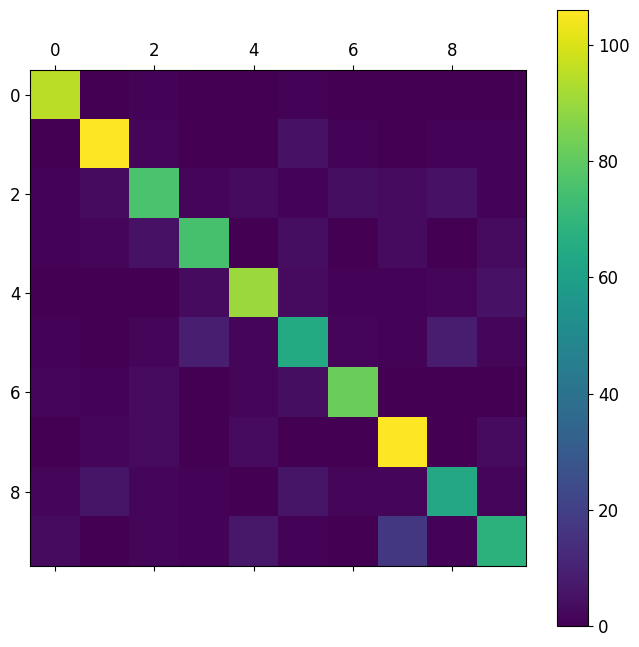

In [64]:
plot_confusion_matrix(conf_mx)

In [70]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

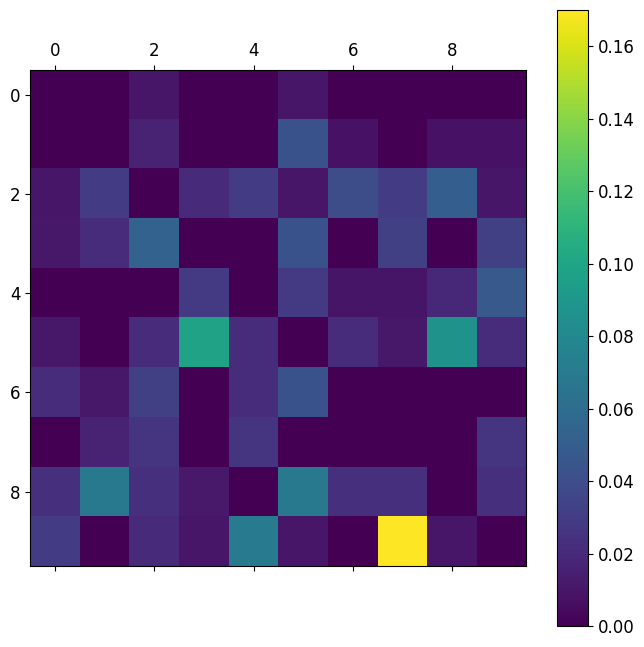

In [71]:
plot_confusion_matrix(norm_conf_mx)

In [81]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

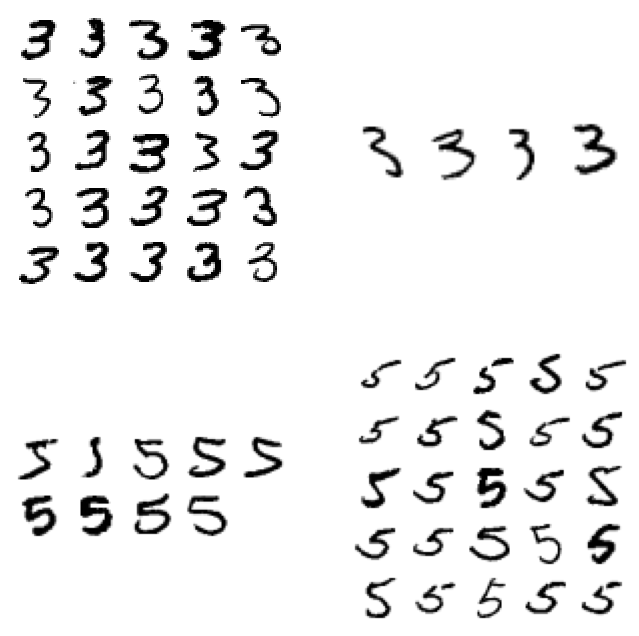

In [83]:
cl_a, cl_b = 3, 5
X_train_parcial = X_train[:1000]
X_aa = X_train_parcial[(y_train[:1000] == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train_parcial[(y_train[:1000] == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train_parcial[(y_train[:1000] == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train_parcial[(y_train[:1000] == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

#Classificação Multirótulos

dois rótulos alvos são criados, se o numero é grande (>7) e ímpar

In [84]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [85]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [90]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train[:1000], y_multilabel[:1000], cv=3)
f1_score(y_multilabel[:1000], y_train_knn_pred, average="macro")

0.8885424739016866

#Classificação Multioutput

In [92]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

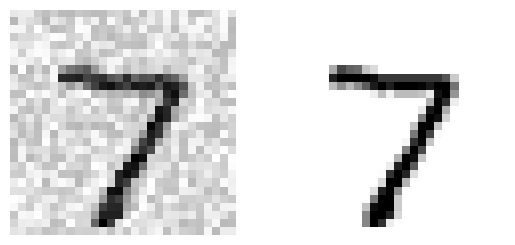

In [93]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

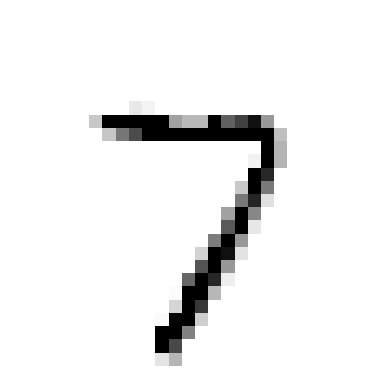

In [94]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)